# Midterm T1 2017

In [40]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

The midterm consists of two parts: 

 - **Easy Zone** which worth 100 point each which most of them you can just copy from exercise/homework
 - **Creative zone** which worth 150 points each.
 - The score for each sub question is equal unless indicated.
 - Comment your code!! If it takes me more than 5 minutes to figure out what your code does, I won't grade it.
 
 The total score is 900 but you will be graded out of 0.9*900=810.

# Easy Stuff (100 Each)

### 1 Taylor Series

1) Find the first 3 *non-zero* terms in Taylor series of
$$f(x) = \frac{1}{2-x}$$

Answer  
taylor series $f(x)$= 1+ (x-1) + (x-1)^{2} + (x-1)^{3}$

In [41]:
def taylor3(x):
    return 1 + (x-1) + (x-1)**2 

2) Use the Taylor series you found in 1) to find $$\frac{1}{0.8}$$ **along with bound on error**.

In [42]:
# 2-x = 0.8
# x =1.2
# c = 1
#xi = [c,x]
#xi = [1, 1.2]
print(taylor3(1.2))
#xi should be 1.2
xi = 1.2
errorterm = (xi-1)**3
print("+-", np.abs(errorterm))
# print(1/0.8)

1.24
+- 0.008


### 2 Bisection (100)

We can find euler number $e$ by solving equation.

$\ln x = 1$




In [43]:
def bisection(f, lower ,upper, error):
    n = np.log(error)-1 # how many iteration

    for i in range(round(np.abs(int(n)))):
        guess = (lower+upper)/2.
        if f(lower)*f(guess) < 0:
            upper = guess    
        else: 
            lower = guess 
    return guess
def f(x):
    return np.log(x) -1

1) If we want to find $e$ by bisection with starting bound of [2,3], how many iteration do we need to get it acuurate to $10^{-6}$

In [44]:
error = 1e-6
n = np.abs(np.log(error))
print(round(n))#the iteration we need

14.0


2) Find $e$ that is accurate up to $10^{-6}$.

In [45]:
print("my answer ",bisection(f,2,3,1e-6))
print("e =",np.e)

my answer  2.71832275390625
e = 2.718281828459045


### 3. Newton's method (100)

In [46]:
def newton(f, start, n): ## start = x0
    h = 1e-9
    x = start
    df= ((f(x+h)-f(x-h))/(h+h))
    for i in range(n):
        x = x- f(x)/df
        df= ((f(x+h)-f(x-h))/(h+h))
    return x

sin = np.sin
cos = np.cos

def f(x):
    return  sin(x) + np.exp(x) + cos(x) -5 

1) Find Newton's method update rule for solving

$\sin(x) + e^x + \cos(x) = 5$


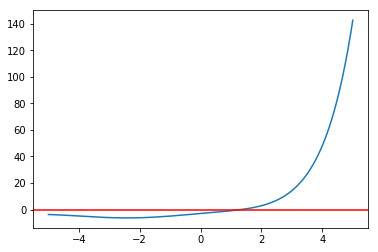

In [47]:
def newton(f, start, n): ## start = x0
    h = 1e-9
    x = start
    ## here is the update rule###
    df= ((f(x+h)-f(x-h))/(h+h))
    for i in range(n):
        x = x- f(x)/df
        df= ((f(x+h)-f(x-h))/(h+h))
    ##############################
    return x

sin = np.sin
cos = np.cos

def f(x):
    return  sin(x) + np.exp(x) + cos(x) -5
xs = np.linspace(-5,5,1000)
plt.plot(xs,[f(x) for x in xs])
plt.axhline(0, color = "red")

2) Solve the above equation. Pick appropriate starting point.

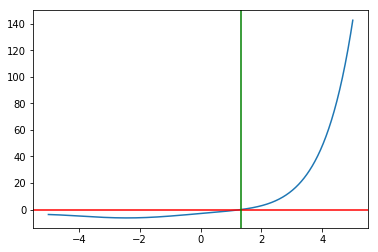

In [48]:
plt.plot(xs,[f(x) for x in xs])
plt.axhline(0, color = "red")
ans = newton(f,0,10)
plt.axvline(ans,color = "green")


3) Draw an example when Newton's method doesn't work.

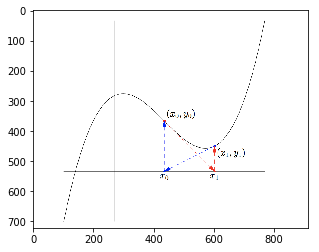

In [49]:
newtonfail = plt.imread('nf.png')
plt.imshow(newtonfail)
plt.figure()
#if star to guess at x0 ,we cannot reach the answer

### 4. Derivative (100)

1) Plot the first and second derivative of $f(x) = e^{-x} \sin(x)$

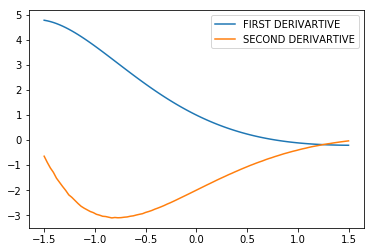

In [50]:
#answer
sin = np.sin
def f(x):
    return np.exp(-x)*sin(x)
def df(f,x):
    h = 1e-7
    return ((f(x+h)-f(x-h))/(h+h))
def ddf(df,f,x):
    h = 1e-7
    return ((df(f,x+h)-df(f,x-h))/(h+h))
xs = np.linspace(-1.5,1.5, 100)
plt.plot(xs, [df(f,x) for x in xs], label = "FIRST DERIVARTIVE")
plt.plot(xs, [ddf(df,f,x) for x in xs], label = "SECOND DERIVARTIVE")
plt.legend()

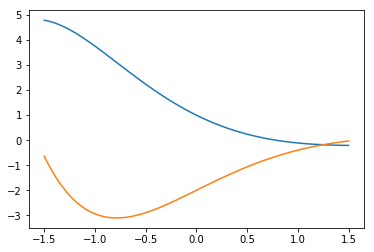

In [51]:
##check
def df(x):
    return np.exp(-x)*(np.cos(x)-np.sin(x))
def ddf(x):
    return -2*(np.exp(-x)*np.cos(x))
plt.plot(xs,[df(x) for x in xs])
plt.plot(xs,[ddf(x) for x in xs])

2) Which formula is better for approximating $f'(x)$. Answer with no justification recieve no credit.
$$
g_1(x) = \frac{f(x+h) - 4 f(x-h) + 3 f(x)}{6h}
$$

$$
g_2(x) = \frac{f(x+2h) - 3f(x-h) + 2f(x)}{5h}
$$

In [52]:
#it does not matter whic hone we pick they are the same

### 5. Legendre (100)

In [53]:
def my_legendre(x, xs, ys):
    #fill in
    val = 0
    for i in range(len(xs)):
        nu = 1
        de = 1
        for j in range(len(xs)):
            if(j!= i):
                nu *= (x - xs[j])
                de *= (xs[i] - xs[j])
                
        val += (ys[i]*nu/de)
        
    return val

1) Find Legendre Polynomial which passes through all these point.

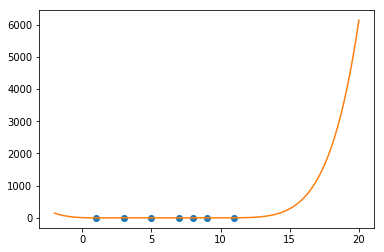

In [54]:
space = np.linspace(-2,20,100)
xs = np.array([1,3,5,7,8,9,11])
ys = np.array([-2.,1,0,-1,0,1,2])
plt.plot(xs, ys, 'o')
plt.plot(space,[my_legendre(s,xs,ys) for s in space])

### 6. Integral (100)

In [55]:
def trapz(f,a,b,n):
    edges = np.linspace(a,b,n+1)
    h = (b-a)/n
    return (sum([f(e) for e in edges]) - 0.5*(f(a) + f(b)))*h


def error(a,b,n,ddf,x0):
    return (b-a)**3/(12*n**2)*ddf(x0)

def cal_error_term(eb,a,b,ddf,x0):
    n =1
    e = error(a,b,n,ddf,x0)
    while(eb< abs(e)):
        n +=1
        e = error(a,b,n,ddf,x0)
    return n


1) We want to calculate

$$\int_3^7 x^3 +1 \; dx$$

using trapezoid rule such that the answer is at most $10^{-5}$ away from the real answer how many pieces do we need?

In [56]:
def ddf(x):
    return 6*x
#xi in [a,b]
#xi in [3,7]
xi = 7
cal_error_term(1e-5,3,7,ddf,xi)

4733

2) Use trapezoid rule to calculate
$$\int_3^7 x^3 + 1 \; dx$$
such that your answer is at most $10^{-5}$ from the real answer.



In [57]:
def f(x):
    return x**3 +1
a =3
b =7
n =cal_error_term(1e-5,3,7,ddf,xi)
ans = trapz(f,a,b,n)
print(ans)

584.000007142


# Creative Stuff (It's actually easier than you think.)

### 7. The other Legendre Polynomial.

Legendre did so many things in the past sometimes we have name clash. This is a different one from what we learned in class. This Legendre Polynomial shows up many places in Physics, Engineering and data analysis. https://en.wikipedia.org/wiki/Legendre_polynomials

In the homework we did fourier series where we found we can approximate complex function as a sum of sine and cosine. We can do the same thing, but instead of using sine and cosine. We will be using (the other) Legendre Polynomail. Let us get started.

Legendre polynomial can be computed recursively by using the following recurrence formula:
$$
    P_0(x) = 1 \\
    P_1(x) = x
$$
and 
$$
    P_{n+1} = \frac{1}{n+1}\left[(2n+1)xP_n(x) - nP_{n-1}(x)\right]
$$
or equivalently(this is easier for coding)
$$
    P_{n} = \frac{1}{n}\left[ (2n-1) x P_{n-1}(x) - (n-1)P_{n-2}(x)\right]
$$

**Task 1** Write a function $P(x, n)$ which computes $P_n(x)$. Check your answer by plotting your $P(x, 4)$ against 
$$P_4(x) = \frac{1}{8}(35x^4-30x^2+3)$$ 
there are couple more for you to check given on wikipedia.

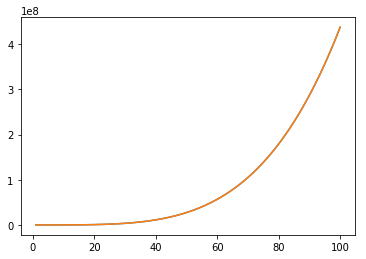

In [19]:
def check(x):
    return (1/8.)*(35*x**4 - 30*x**2 + 3)

def P(x,n):
    if(n == 0):
        return 1
    if(n == 1):
        return x
    else:
        return (1/n)*((2*n-1)*x*(P(x,n-1))-(n-1)*P(x,n-2))
    
xs = np.linspace(1,100,100)
plt.plot(xs,[check(x) for x in xs])
plt.plot(xs,[P(x,4) for x in xs])

**Task 2** Legendre Polynomial has a very nice property that is
$$
\int_{-1}^{1} P_n(x)P_m(x) \; dx = \begin{cases} 
0 & \text{if }n\neq m \\
\frac{2}{2n+1} & \text{if } n = m
\end{cases}
$$

We know something about how to get computer to do integral. **Numerically show that this property is true for all pairs of n,m from 0 to 4.**

Clarification: Write a function that compute the right handside quickly and compare left and right hand side. Pick a suitable number of subdivision. They should be close enough.

In [20]:
def trapz(f,a,b,n):
    edges = np.linspace(a,b,n+1)
    h = (b-a)/n
    return (sum([f(e) for e in edges]) - 0.5*(f(a) + f(b)))*h

def check(n,m):
    if(n != m):
        return 0
    else:
        return 2/((2*n)+1)
    
def P(x,n):
    if(n == 0):
        return 1
    if(n == 1):
        return x
    else:
        return (1/n)*(((2*n-1)*x*(P(x,n-1)))-((n-1)*P(x,n-2)))
    
def PnPm(n,m):
    a = -1
    b = 1
    f = lambda z: P(z,n)*P(z,m)
    return trapz(f,a,b, 2000)


In [21]:
allnm = [ (i,j) for i in range(5) for j in range(5)]
# for i,j in allnm:
#     print(check(i,j))
#     print(PnPm(i,j))
#     print(" ")
   

**Task 3** The property we learned in Task2 is called Orthorgornality. This is actually what make fourier series magic in the homework works. This means that we can also write a complex function as a sum of Legendre Polynomials just as we did with sine and cosine in homework.

$$
    f(x) = a_0 P_0(x) + a_1 P_1(x) + a_2 P_2(x) + a_3 P_3(x) + a_4 P_4(x) + \ldots
$$

where

$$
    a_i = \frac{2i+1}{2}\int_{-1}^{1} f(x) P_i(x) dx
$$
(Bonus:(0.0000000001 Point) Prove the above formula.)

For example, an approximation of triangle function using sum of Legendre Polynomial for triangle function is shown below.
![Triangle Aproximation](leg_series.png)

**Your job: Find all the coefficient and make the plot above**

Note: up to P20 one may take a while so do up to P5 and P10 and make sure you get it right first.

In [37]:
def trapz(f,a,b,n,i):
    edges = np.linspace(a,b,n+1)
    h = (b-a)/n
    return (sum([f(e,i) for e in edges]) - 0.5*(f(a,i) + f(b,i)))*h

def tri(x):
    return 1 - np.abs(x)

def P(x,n):
    if(n == 0):
        return 1
    if(n == 1):
        return x
    else:
        return (1/n)*((2*n-1)*x*(P(x,n-1))-(n-1)*P(x,n-2))
    
def f(x,i):
    return tri(x)*P(x,i)

def gen_a(n):
    lst = []
    for i in range(n+1):
        lst.append(((2*i+1)/2)*trapz(f,-1,1,100,i))
    return lst

def leg_s(x,n,ac_lst,f):
    s = 0
    for i in range(n+1):
        ai = ac_lst[i]
        s += ai*P(x,i)
    return s
        
    

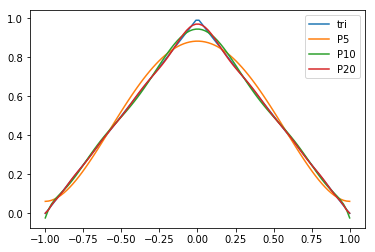

In [38]:
xs = np.linspace(-1,1,100)
plt.plot(xs,[tri(x) for x in xs], label = "tri")

n = 5
ac_lst = gen_a(n)
plt.plot(xs, [leg_s(x,n,ac_lst,f) for x in xs],label = "P5")

n = 10
ac_lst = gen_a(n)
plt.plot(xs, [leg_s(x,n,ac_lst,f) for x in xs], label ="P10")

n = 20
ac_lst = gen_a(n)
plt.plot(xs, [leg_s(x,n,ac_lst,f) for x in xs], label ="P20")

plt.legend()

### 8 Ply's Buffet Restaurant. (150)

Since it's late evening and I know you are hungry. Let's do a problem about food.

Ply apple shop business is doing very well so he expands his business line to Shabu Shabu Buffet called Meme Shabu since he know how to maximize the profit using Poisson distribution. Let us assume that the number of people who wants to eat at his restaurant each day also follows poisson distribution $P(x; \lambda)$.

It's not practical to determine how many days he sell off his buffet like in his apple shop since the food can go over a day. But Ply need to find some other method to determine the parameter $\lambda$ which he can use to improve his business.

Luckily Meme Shabu has a restaurant rating card which *every customer* fills. The rating goes from 5 to 0 stars and the nature of rating customer gives goes as follow
 - First 50 people for that day will always give 5 stars(each). Since they got good service
 - Next 50 people, will give 4 stars(each).
 - Next 50 peole, will give 3 stars(each).
 - Next 50 peole, will give 2 stars(each).
 - Next 50 peole, will give 1 stars(each).
 - The rest will either give 0 star(since they didn't receive service).
 
For example, if there are 157 people who wants to eat at Meme Shabu. The total number of star would be $50*5 + 50*4 + 50*3 + 7*2$. It goes like tax bracket you did in programming 1.

Ply found that on average the **total** number of stars his Shabu restaurant gets is 500 stars. **Find $\lambda$.**

In [88]:
##GGWP##
def p(lmd, k):
    return np.exp(k*np.log(lmd) - lmd - (math.lgamma(k+1)))

def peopleTostar(pl):
    star = 0
    if(50%pl<=50):
        if(50%pl > 0):
            star+=5*(50%pl)
        else:
            star+=5*pl
            return star
        star-=(50%pl)
    if(50%pl<=50):
        if(50%pl > 0):
            star+=4*(50%pl)
        else:
            star+=4*pl
            return star
        star-=(50%pl)
    if(50%pl<=50):
        if(50%pl > 0):
            star+=3*(50%pl)
        else:
            star+=3*pl
            return star
        star-=(50%pl)
    if(50%pl<=50):
        if(50%pl > 0):
            star+=2*(50%pl)
        else:
            star+=2*pl
            return star
        star-=(50%pl)
    if(50%pl<=50):
        if(50%pl > 0):
            star+=1*(50%pl)
        else:
            star+=1*pl
            return star
        star-=(50%pl)
    return star
        
print(peopleTostar(250))

500


In [65]:
#avr 500 stars
# I need to find 
maximum_stars = (50*5) + (50*4) + (50*3) + (50*2) + (50*1) #+ 0*(total-250)
print(maximum_stars)
avr_stars = 500


750


In [75]:
50%500

50

In [71]:
50%450

50

In [73]:
50%30

20